<a href="https://colab.research.google.com/github/MK316/Workingpapers/blob/main/Hclustering_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=m_zaJakEUm4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
url = "https://raw.githubusercontent.com/MK316/Workingpapers/main/results/ksat_LD_result.csv"
df1 = pd.read_csv(url)

In [7]:
df1.head()

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
0,2022,Context,Q40,Philip Kitcher and Wesley Salmon have suggeste...,1069,"['Philip', 'Kitcher', 'and', 'Wesley', 'Salmon...",154,"['philip', 'kitcher', 'and', 'wesley', 'salmon...",0.519481,6.446584,0.869976,0.059439,0.706667,0.688381,0.708912,39.029817,38.831169,34.360697
1,2021,Context,Q40,From a cross-cultural perspective the equation...,1086,"['From', 'a', 'cross-cultural', 'perspective',...",180,"['from', 'a', 'crosscultural', 'perspective', ...",0.561111,7.528096,0.888727,0.049339,0.780000,0.750076,0.788483,57.070312,62.005556,51.710000
2,2020,Context,Q40,"Biological organisms, including human societie...",1052,"['Biological', 'organisms,', 'including', 'hum...",154,"['biological', 'organism', 'include', 'human',...",0.681818,8.461141,0.923963,0.034759,0.846667,0.812571,0.871256,106.436537,111.837662,83.236071
3,2019,Context,Q40,"Biological organisms, including human societie...",1052,"['Biological', 'organisms,', 'including', 'hum...",154,"['biological', 'organism', 'include', 'human',...",0.681818,8.461141,0.923963,0.034759,0.846667,0.812571,0.871256,106.436537,111.837662,83.236071
4,2018,Context,Q40,Time spent on on-line interaction with members...,1171,"['Time', 'spent', 'on', 'on-line', 'interactio...",175,"['time', 'spend', 'on', 'online', 'interaction...",0.685714,9.071147,0.926949,0.032568,0.806667,0.806984,0.839168,98.199129,119.142857,104.332063


In [13]:
df_selected = df1[['N_Splits','TTR','RTTR','LogTTR','HDD','MTLD','MA']]

In [8]:
from sklearn.preprocessing import normalize

In [14]:
data_scaled = normalize(df_selected)

In [20]:
data_scaled = pd.DataFrame(data_scaled, columns = df_selected.columns)

In [21]:
data_scaled.head()

,N_Splits,TTR,RTTR,LogTTR,HDD,MTLD,MA
0,0.946674,0.003193,0.039629,0.005348,0.004358,0.239925,0.211223
1,0.918686,0.002864,0.038422,0.004536,0.004024,0.291276,0.263918
2,0.751026,0.003325,0.041263,0.004506,0.004249,0.519069,0.405925
3,0.751026,0.003325,0.041263,0.004506,0.004249,0.519069,0.405925
4,0.773114,0.003029,0.040074,0.004095,0.003707,0.433824,0.460918


In [22]:
import scipy.cluster.hierarchy as sch

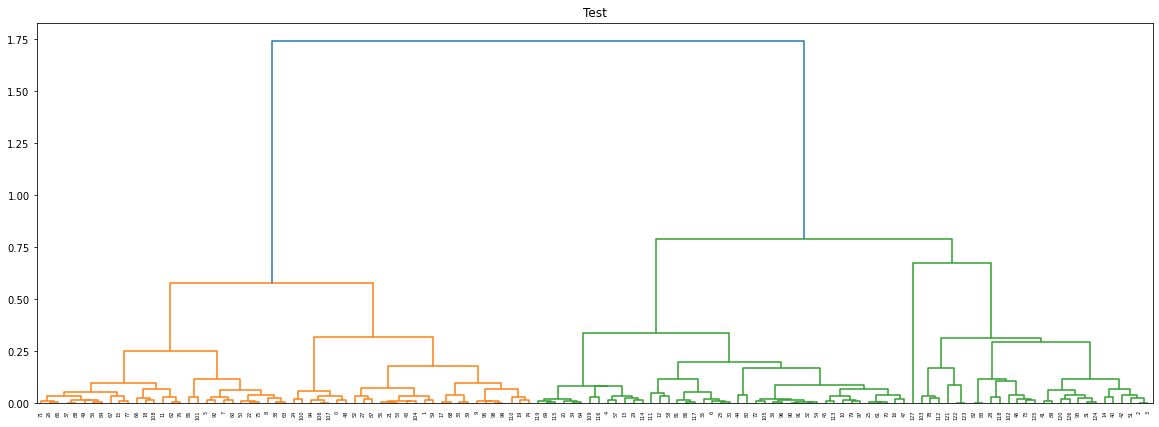

In [24]:
plt.figure(figsize = (20,7))
plt.title("Test")
dend = sch.dendrogram(sch.linkage(data_scaled, method="ward"))